# About the Project

IKUTA Toma 26002300256
This project follows the structure below.
1. Problem Definition
2. Data Collection
3. Data Analysis
4. Model Selection and Fitting
5. Model Validation
6. Forecasting Model Deployment
7. Monitoring Forecasting Model Performance
## Environment
please set up the virtual environemnt with **env.yml**.

You can check the time table from the side bar in the jupyter lab.

# 1. Problem Definition
Car accidents happen constantly around the world, and many variables and situations are involved.

This project focuses on a historical and cross-sectional data in france from 2005 to 2016 and aims to achieve the goals below.

Only quantitative research is to be conducted.

## Project Goal
- to reveal the variable that contribute to the car accidents the most.
- to predict the future number of car accidents in france.

# 2. Data Collection
## Dataset Structure
"Accidents in France from 2005 to 2016" from Kaggle: 

https://www.kaggle.com/datasets/ahmedlahlou/accidents-in-france-from-2005-to-2016?select=caracteristics.csv

caracteristics.csv is to be used that contains 840k data in total.


### Column Description
The table is created based on the description written by the provider.

| **Variable** | **Description** |
|--------------|-----------------|
| `Num_Acc`    | Accident ID |
| `jour`       | Day of the accident |
| `mois`       | Month of the accident |
| `an`         | Year of the accident |
| `hrmn`       | Time of the accident in hour and minutes (format: hhmm) |
| `lum`        | **Lighting conditions:**<br>1 - Full day<br>2 - Twilight or dawn<br>3 - Night without public lighting<br>4 - Night with public lighting not lit<br>5 - Night with public lighting on |
| `dep`        | **Department (INSEE code)**, followed by a 0<br>e.g., 201 = Corse-du-Sud, 202 = Haute-Corse |
| `com`        | **Municipality code** (INSEE 3-digit commune number) |
| `agg`        | **Accident location type:**<br>1 - Out of agglomeration<br>2 - In built-up areas |
| `int`        | **Type of intersection:**<br>1 - Out of intersection<br>2 - Intersection in X<br>3 - Intersection in T<br>4 - Intersection in Y<br>5 - Intersection with more than 4 branches<br>6 - Roundabout<br>7 - Place<br>8 - Level crossing<br>9 - Other intersection |
| `atm`        | **Atmospheric conditions:**<br>1 - Normal<br>2 - Light rain<br>3 - Heavy rain<br>4 - Snow or hail<br>5 - Fog or smoke<br>6 - Strong wind or storm<br>7 - Dazzling weather<br>8 - Cloudy weather<br>9 - Other |
| `col`        | **Type of collision:**<br>1 - Two vehicles - frontal<br>2 - Two vehicles - rear-end<br>3 - Two vehicles - side collision<br>4 - ≥3 vehicles - chain collision<br>5 - ≥3 vehicles - multiple collisions<br>6 - Other collision<br>7 - No collision |
| `adr`        | Postal address (only filled for accidents in built-up areas) |
| `gps`        | **GPS origin code:**<br>M - Métropole<br>A - Antilles (Martinique/Guadeloupe)<br>G - Guyane<br>R - Réunion<br>Y - Mayotte |
| `lat`        | Latitude (in decimal degrees) |
| `long`       | Longitude (in decimal degrees) | 

# 3. Data Analysis

## Pre-Processing
- rename the column names for human readability
- integrate the time information into the new column "timestamp"
- remove irrevant variables

### Column Description After Pre-Processing
### Data Amount
839985 rows with 7 columns

| **Variable** | **Description** | **Data Type** |
|--------------|-----------------|-----------------|
| `accident_id`| Accident ID | int64 |
| `lighting`   | **Lighting conditions:**<br>1 - Full day<br>2 - Twilight or dawn<br>3 - Night without public lighting<br>4 - Night with public lighting not lit<br>5 - Night with public lighting on | int64 |
| `localisation` | **Accident location type:**<br>1 - Out of agglomeration<br>2 - In built-up areas | int64 |
| `intersection` | **Type of intersection:**<br>1 - Out of intersection<br>2 - Intersection in X<br>3 - Intersection in T<br>4 - Intersection in Y<br>5 - Intersection with more than 4 branches<br>6 - Roundabout<br>7 - Place<br>8 - Level crossing<br>9 - Other intersection | int64 |
| `atmospheric_condition`        | **Atmospheric conditions:**<br>1 - Normal<br>2 - Light rain<br>3 - Heavy rain<br>4 - Snow or hail<br>5 - Fog or smoke<br>6 - Strong wind or storm<br>7 - Dazzling weather<br>8 - Cloudy weather<br>9 - Other | int64 |
| `collision_type`        | **Type of collision:**<br>1 - Two vehicles - frontal<br>2 - Two vehicles - rear-end<br>3 - Two vehicles - side collision<br>4 - ≥3 vehicles - chain collision<br>5 - ≥3 vehicles - multiple collisions<br>6 - Other collision<br>7 - No collision | int64 |
| `timestamp`  | Accident time | datetime64[ns] |




### Import Packages

In [81]:
import calendar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.sm_exceptions import ValueWarning
import statsmodels.api as sm
from pandas.plotting import lag_plot, autocorrelation_plot
import datetime
import math
import codecs
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", category=ValueWarning)

In [2]:
# load a csv
file = '../dataset/france/caracteristics.csv'
with codecs.open(file, 'r', 'utf-8', 'ignore') as file:
    df = pd.read_csv(file, low_memory=False)

# rename column names
rename_col = {'Num_Acc': 'accident_id',
              'an': 'year', 
              'mois': 'month', 
              'jour':'day',
              'hrmn':'time', 
              'lum':'lighting', 
              'dep':'NSEE_code', 
              'com':'municipality',
              'agg':'localisation',
              'int':'intersection', 
              'atm':'atmospheric_condition', 
              'col':'collision_type', 
              'adr':'postal_address' }
df = df.rename(columns=rename_col)

#drop unnecessary columns
df = df.drop(['municipality', 
              'postal_address', 
              'gps', 
              'lat', 
              'long', 
              'NSEE_code'],
             axis=1)

time_col = ['year', 'month', 'day', 'time']

for col, w in zip(time_col, [2,2,2,4]):
    df[col] = df[col].astype(str).str.zfill(w)


df['timestamp'] = df[time_col].agg(''.join, axis=1).pipe(pd.to_datetime, format="%y%m%d%H%M")

#drop time columns other than timestamp
df = df.drop(time_col ,axis=1)

# change data types : -1 => NaN
df['atmospheric_condition'] = df['atmospheric_condition'].fillna(-1).astype(int)
df['collision_type'] = df['collision_type'].fillna(-1).astype(int)
df.head()

,accident_id,lighting,localisation,intersection,atmospheric_condition,collision_type,timestamp
0,201600000001,1,2,1,8,3,2016-02-01 14:45:00
1,201600000002,1,2,6,1,6,2016-03-16 18:00:00
2,201600000003,1,1,1,1,6,2016-07-13 19:00:00
3,201600000004,2,2,1,7,3,2016-08-15 19:30:00
4,201600000005,1,2,3,1,3,2016-12-23 11:00:00


In [3]:
print("--Data Amount--")
print(df.shape[0], "rows")
print("    ", df.shape[1], "columns")
print("\n--Data type--")
print(df.dtypes, "\n")
print("--The number of Nan values--")
print(df.isna().sum())

--Data Amount--
839985 rows
     7 columns

--Data type--
accident_id                       int64
lighting                          int64
localisation                      int64
intersection                      int64
atmospheric_condition             int64
collision_type                    int64
timestamp                datetime64[ns]
dtype: object 

--The number of Nan values--
accident_id              0
lighting                 0
localisation             0
intersection             0
atmospheric_condition    0
collision_type           0
timestamp                0
dtype: int64


### Define Lists Correspond to Numbers in Columns

lists here       : 0-based-indexing

elements in data: 1-based-indexing

In [4]:

            
list_lighting =['Full day', 
              'Twilight or dawn', 
              'Night without public lighting', 
              'Night with public lighting not lit', 
              'Night with public lighting on']

list_localisation = ['Out of agglomeration',
                   'built-up areas']

list_intersection = ['Out of intersection', 
                   'X intersection', 
                   'T intersection', 
                   'Y intersection']

list_atmospheric_condition = ['Normal', 
                            'Light rain',
                            'Snow - hail',
                            'Fog - smoke', 
                            'Strong wind - storm',
                            'Dazzling weather',
                            'Cloudy weather',
                            'Other']

list_collision_type = ['Two vehicles - frontal', 
                     'Two vehicles - from the rear',
                    'Two vehicles - by the side',
                    'Three vehicles and more - in chain',
                    'Three or more vehicles - multiple collisions',
                    'Other collision',
                     'Without collision']


## Visualize Timestamp-Number of Accidents

In [5]:
df_time = df[['accident_id', 'timestamp']].set_index('timestamp').rename_axis(None, axis=0)

#count accidents in each day
df_ymd = df_time.groupby([df_time.index.year, df_time.index.month,df_time.index.day]).size()
df_ymd.name = "accidents"
df_ymd = df_ymd.to_frame()
df_ymd.index = pd.to_datetime(df_ymd.index.map(lambda x: f"{x[0]}-{x[1]:02d}-{x[2]:02d}"))
df_ymd

,accidents
2005-01-01,180
2005-01-02,137
2005-01-03,234
2005-01-04,279
2005-01-05,270
...,...
2016-12-27,144
2016-12-28,139
2016-12-29,110
2016-12-30,125


### Timeseries Plot

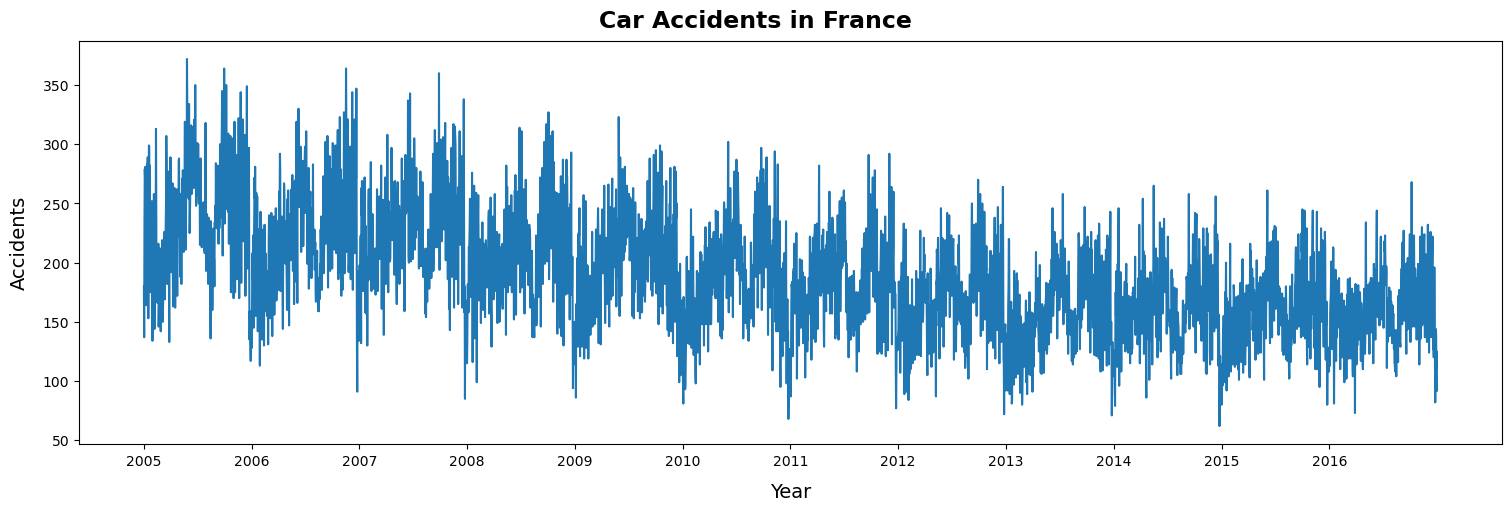

In [6]:
# Create a graph of df_ymd
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(15, 5))

fontsize = 17

fig.suptitle("Car Accidents in France", fontsize=fontsize, fontweight='bold')

ax.plot(df_ymd.index, df_ymd['accidents'])
ax.set_xlabel('Year', fontsize=fontsize-3, labelpad=10)  # Increase distance from axis
ax.set_ylabel('Accidents', fontsize=fontsize-3, labelpad=10)
ax.set_xticks(pd.date_range(start=df_ymd.index.min(), end=df_ymd.index.max(), freq='YS'))
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

### ADF Test to Determine If It's Stationary

It's not stationary data from the result

In [7]:
adf_result = adfuller(df_ymd["accidents"])
alpha = 0.05
p_value = adf_result[1]
if p_value < alpha:
    print("p-value", p_value, "\n")
    print("failed to reject the null hypothesis")
    print("it doesn't seem to be stationary")
else:
    print("p-value", p_value)
    print("accept the null hypothesis")
    print("it seems to be stationary")
    

p-value 4.399823063336105e-05 

failed to reject the null hypothesis
it doesn't seem to be stationary


### Box-and-Whisker Plot, Heatmap, ACP, PACP, and Seasonal Plots

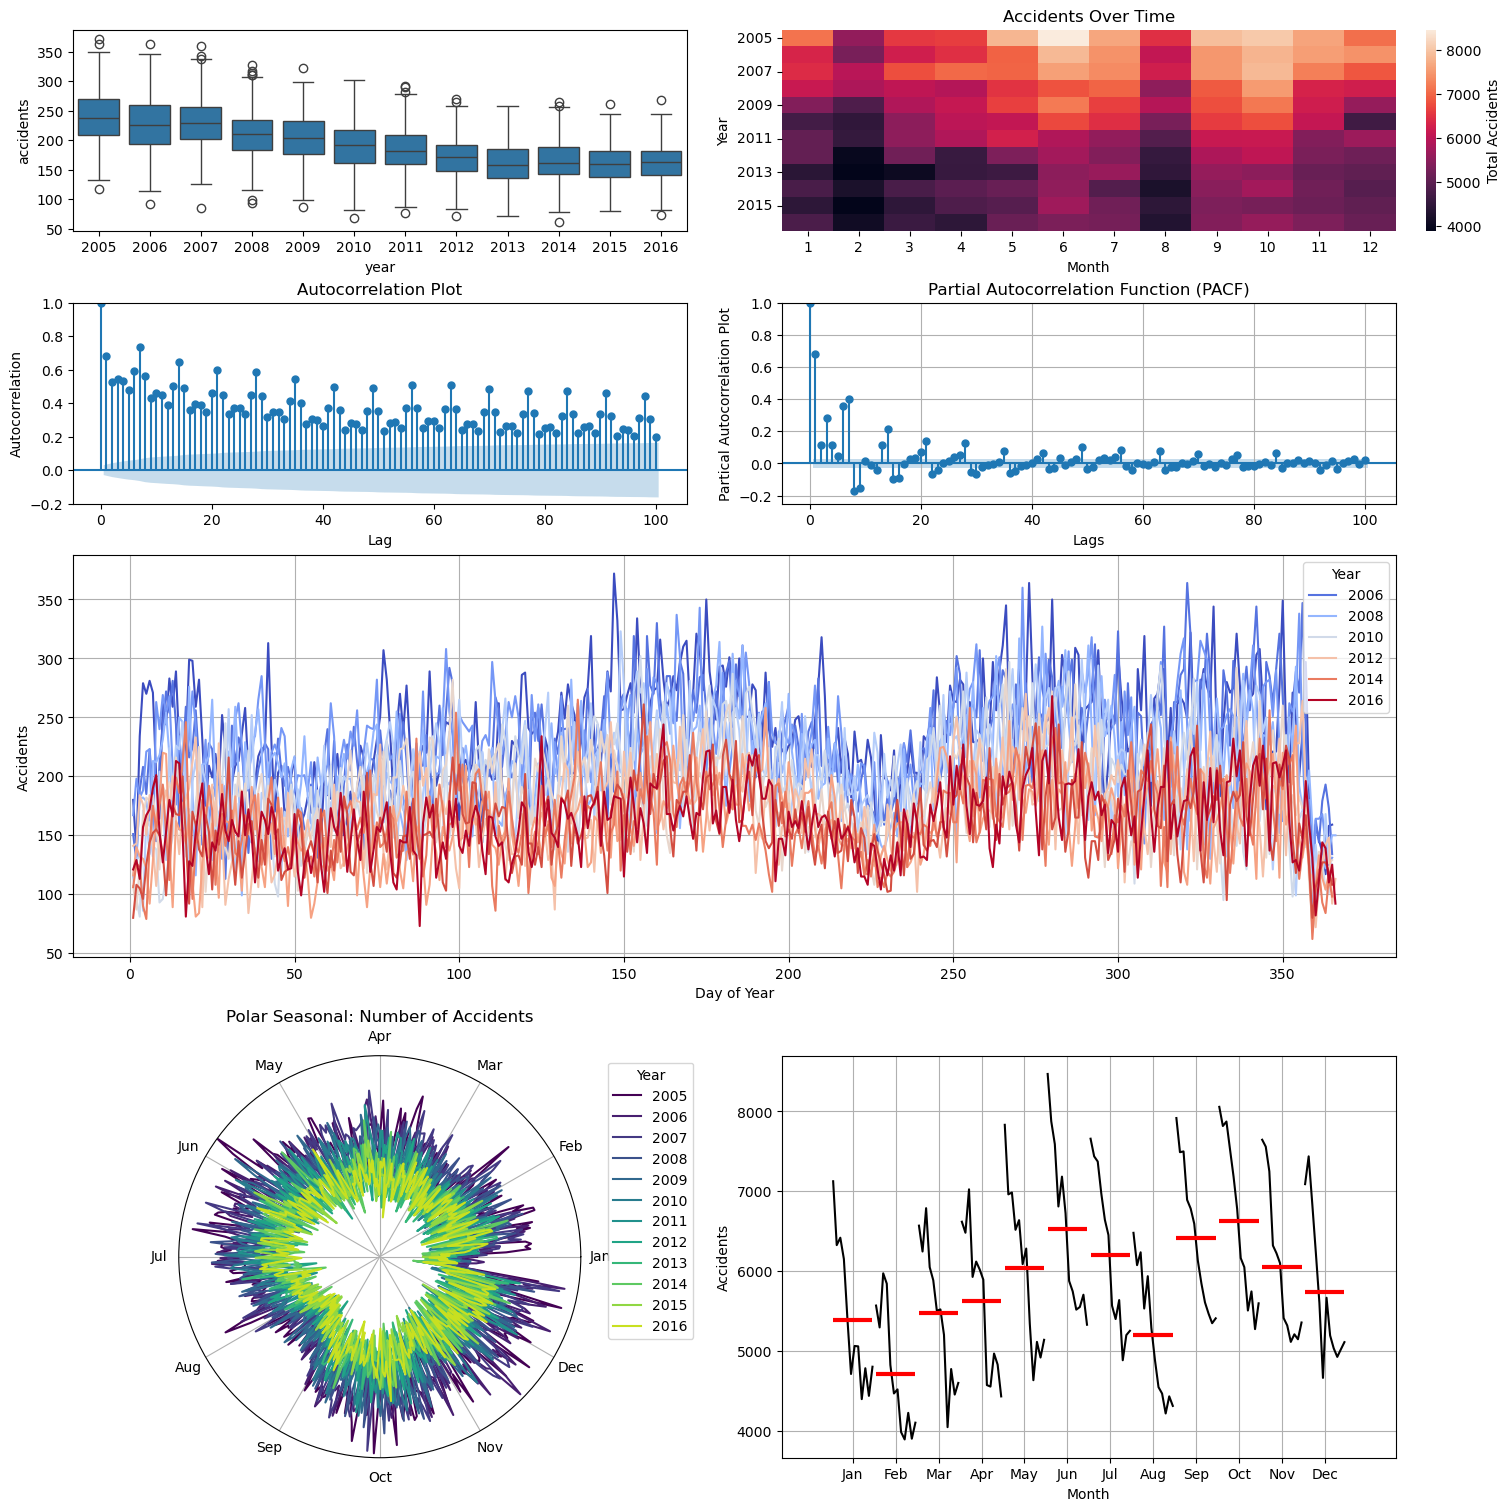

In [112]:
copy_df_ymd = df_ymd.copy()
copy_df_ymd["year"] = df_ymd.index.year
copy_df_ymd["month"] = df_ymd.index.month
copy_df_ymd["day"] = df_ymd.index.dayofyear

df_ym = df_ymd.groupby([df_ymd.index.year, df_ymd.index.month]).sum()
df_ym.index = pd.to_datetime(df_ym.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))

fig = plt.figure(constrained_layout=True, figsize=(15, 15))
gs = gridspec.GridSpec(6, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2:4, 0:2])
ax6 = fig.add_subplot(gs[4:6, 0],polar=True)
ax7 = fig.add_subplot(gs[4:6, 1])

sns.boxplot(data=copy_df_ymd, x="year", y="accidents", ax=ax1);

# heat map
accidents_month_year = copy_df_ymd.groupby(["year", "month"]).sum()
accidents_month_year = accidents_month_year.reset_index().pivot(index="year", columns="month", values="accidents")

sns.heatmap(accidents_month_year, cbar_kws={"label": "Total Accidents"},ax=ax2)
ax2.set_title("Accidents Over Time")
ax2.set_xlabel("Month")
for label in ax2.get_yticklabels():
    label.set_rotation(0)
ax2.set_ylabel("Year");

plot_acf(copy_df_ymd['accidents'], lags=100, ax=ax3) 
ax3.set_xlabel('Lag')
ax3.set_ylabel('Autocorrelation')
ax3.set_title('Autocorrelation Plot')
ax3.set_ylim([-0.2,1])

plot_pacf(copy_df_ymd['accidents'], lags=100, ax=ax4)  # Change lags according to your data
ax4.set_xlabel('Lags')
ax4.set_ylabel('Partical Autocorrelation Plot')
ax4.set_title('Partial Autocorrelation Function (PACF)')
ax4.grid(True)
ax4.set_ylim([-0.25,1])

sns.lineplot(data=copy_df_ymd, x=copy_df_ymd['day'], y='accidents', hue='year', palette='coolwarm', ax=ax5)
ax5.set(xlabel='Day of Year', ylabel='Accidents')
ax5.grid()
ax5.legend(title='Year')


cm = plt.get_cmap('viridis')
for (i, p) in enumerate(copy_df_ymd['year'].unique()):
    color = cm(i / len(copy_df_ymd['year'].unique()))
    values = copy_df_ymd[copy_df_ymd['year'] == p]['accidents']
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
    values = np.concatenate((values, [values[0]]))  # Close the plot
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot
    ax6.plot(angles, values, label=str(p), color=color)

month_angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)
month_names = [calendar.month_abbr[i+1] for i in range(12)]
ax6.set_xticks(month_angles)
ax6.set_xticklabels(month_names)
ax6.set_rlabel_position(90)
ax6.set_rticks([])
ax6.set_rmax(copy_df_ymd['accidents'].max())
ax6.set_title('Polar Seasonal: Number of Accidents')
ax6.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

sm.graphics.tsa.month_plot(df_ym['accidents'], ax=ax7)
ax7.set(xlabel='Month', ylabel='Accidents')
ax7.grid()

### Classical Decomposition and STL Decomposition

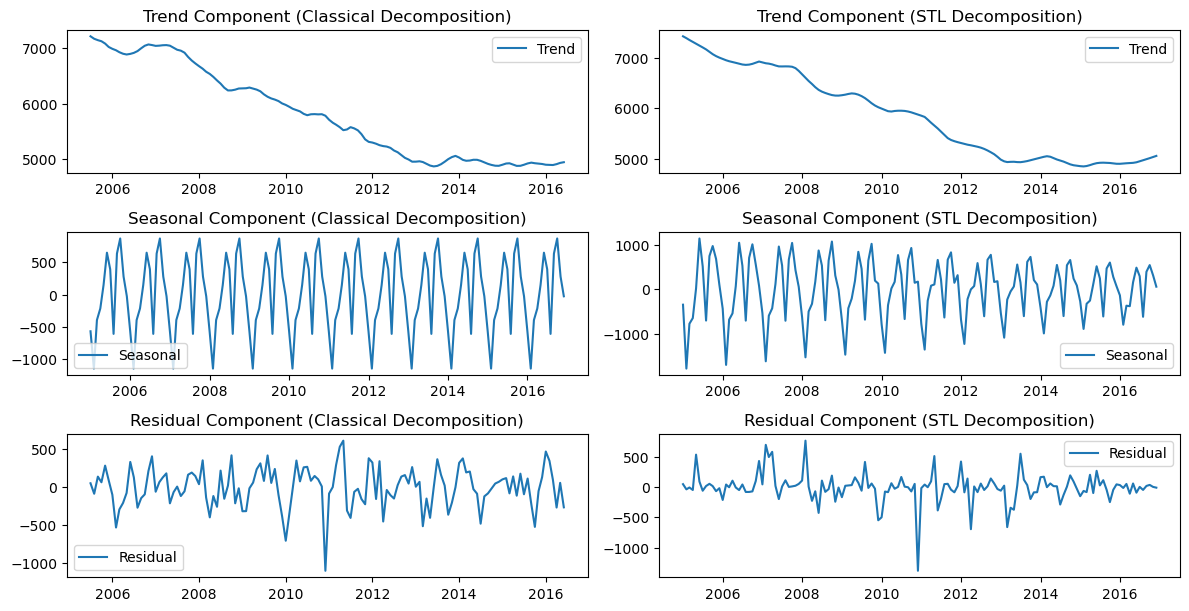

In [100]:
classical_dcmp = seasonal_decompose(df_ym, model='additive', period=12)

t_v = 12 + 1 # 12 month + 1 (to be an odd number)
p_v = 12 # seasonal change by 3 months

stl=STL(df_ym['accidents'], period=p_v, trend=t_v, robust=True)
stl_result = stl.fit()

plt.figure(figsize=(12, 8))

# Classical Decomposition Components
plt.subplot(4, 2, 1)
plt.plot(df_ym.index, classical_dcmp.trend, label='Trend')
plt.title('Trend Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(df_ym.index, classical_dcmp.seasonal, label='Seasonal')
plt.title('Seasonal Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(df_ym.index, classical_dcmp.resid, label='Residual')
plt.title('Residual Component (Classical Decomposition)')
plt.legend()

# STL Decomposition Components
plt.subplot(4, 2, 2)
plt.plot(df_ym.index, stl_result.trend, label='Trend')
plt.title('Trend Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(df_ym.index, stl_result.seasonal, label='Seasonal')
plt.title('Seasonal Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(df_ym.index, stl_result.resid, label='Residual')
plt.title('Residual Component (STL Decomposition)')
plt.legend()

plt.tight_layout()

### Test If the Residuals are White Noises With Ljung-Box Test

In [101]:
def is_white_noise(dcm, resid):
    lag = 10
    ljungbox_result = sm.stats.acorr_ljungbox(resid, lags=[lag], return_df=True)
    p_value = ljungbox_result["lb_pvalue"][lag]
    print("-------About {}-------".format(dcm))
    if p_value < 0.05:
        print("Failed to reject the null hypothesis")
        print("the residuals are not likely independent")
    else:
        print("Accept the null hypothesis")
        print("the residuals are likely independent")

    print("\n")

is_white_noise("Classical decomposition", classical_dcmp.resid)
is_white_noise("STL decomposition", stl_result.resid)

-------About Classical decomposition-------
Accept the null hypothesis
the residuals are likely independent


-------About STL decomposition-------
Accept the null hypothesis
the residuals are likely independent




## Variable Analysis

In [109]:
df.head()

,accident_id,lighting,localisation,intersection,atmospheric_condition,collision_type,timestamp
0,201600000001,1,2,1,8,3,2016-02-01 14:45:00
1,201600000002,1,2,6,1,6,2016-03-16 18:00:00
2,201600000003,1,1,1,1,6,2016-07-13 19:00:00
3,201600000004,2,2,1,7,3,2016-08-15 19:30:00
4,201600000005,1,2,3,1,3,2016-12-23 11:00:00


0 0
1 0
1 1
2 0
2 1
2 2
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
4 4


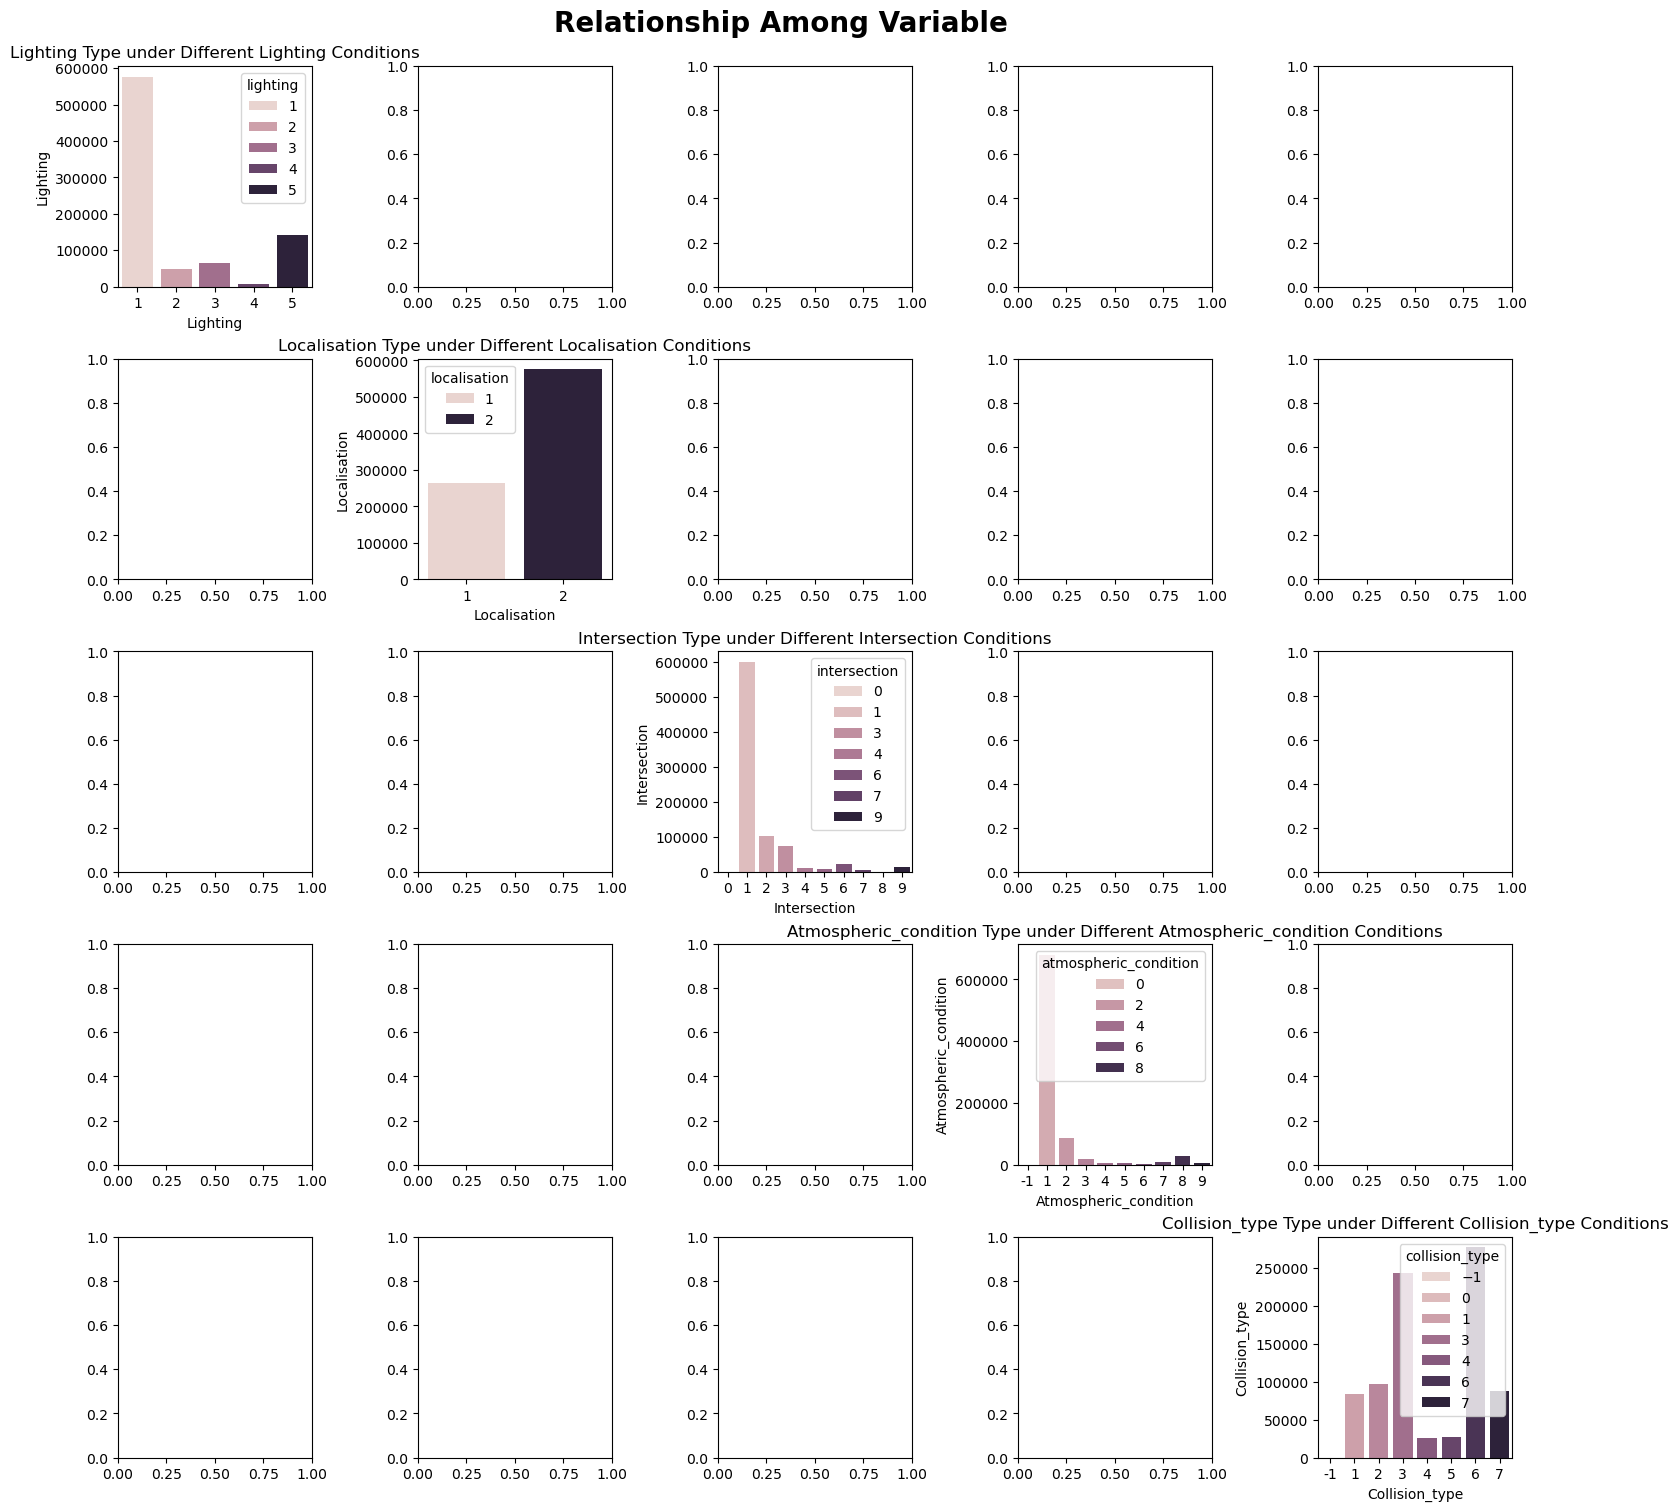

In [123]:
condition_list = ["lighting","localisation","intersection","atmospheric_condition", "collision_type"]

fig, ax = plt.subplots(5, 5, layout='constrained', figsize=(15, 15))
fig.suptitle("Relationship Among Variable", fontsize=20, fontweight='bold')


for i, c1 in enumerate(condition_list):
    for j, c2 in enumerate(condition_list):
        print(i,j)
        ax_ij = ax[i][j]
        if c1 == c2:
            sns.countplot(df, x=c1, ax=ax_ij)
            break;
        sns.countplot(data=df, x=c1, hue=c2, ax=ax_ij)
        ax_ij.set_title("{} Type under Different {} Conditions".format(c1.capitalize(),c2.capitalize()))
        ax_ij.set_xlabel(c1.capitalize())
        ax_ij.set_ylabel(c2.capitalize())


# 4. Model Selection and Fitting

## Comparison Among Seasonal Naïve Method, Holt-Winters Seasonal Smoothing, and SARIMA Model

In [91]:
h = 24
sn_train = df_ym['accidents'][:h]
sn_test = df_ym['accidents'][-h:]

m = 12
k = int(np.floor(h / m))
T = (len(sn_train)-1)

sn_pred = []
for i in range(1,h+1):
    sn_pred.append(sn_train[T+i-m*(k+1)])

In [92]:
h = 24
m = 12
hws_train = df_ym['accidents'][:-h]
hws_test = df_ym['accidents'][-h:]

# Holt-Winters model
HW_model = ExponentialSmoothing(hws_train,
                                trend='additive',
                                seasonal='additive',
                                seasonal_periods=m)

HW_model_fit = HW_model.fit()
HW_pred = list(HW_model_fit.forecast(h).values)

In [94]:
h = 24
sa_train = df_ym['accidents'][:-h]
sa_test = df_ym['accidents'][-h:]
sarima_model = sm.tsa.SARIMAX(sa_train, order=(1,1,1),seasonal_order=(1,1,1,12))

SA_model_fit = sarima_model.fit()

SA_pred = list(SA_model_fit.forecast(h).values)

# print("Forecast:")
# print(SA_pred)



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59384D+00    |proj g|=  1.82163D-01

At iterate    5    f=  6.52864D+00    |proj g|=  5.18305D-02

At iterate   10    f=  6.52003D+00    |proj g|=  3.40625D-03

At iterate   15    f=  6.51953D+00    |proj g|=  2.54844D-03

At iterate   20    f=  6.50324D+00    |proj g|=  5.61276D-02

At iterate   25    f=  6.45129D+00    |proj g|=  1.75773D-02

At iterate   30    f=  6.45076D+00    |proj g|=  4.57609D-04

At iterate   35    f=  6.45051D+00    |proj g|=  1.01059D-03

At iterate   40    f=  6.45043D+00    |proj g|=  3.60519D-04

At iterate   45    f=  6.45042D+00    |proj g|=  2.12464D-05

At iterate   50    f=  6.45042D+00    |proj g|=  2.88217D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/ikutatouma/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [102]:


print('RMSE:')
print(np.sqrt(mean_squared_error(sn_test, sn_pred)))

print('MAE:')
print(mean_absolute_error(sn_test, sn_pred))

print('MAPE:')
print(mean_absolute_percentage_error(sn_test, sn_pred))


print('RMSE:')
print(np.sqrt(mean_squared_error(hws_test, HW_pred)))

print('MAE:')
print(mean_absolute_error(hws_test, HW_pred))

print('MAPE:')
print(mean_absolute_percentage_error(hws_test, HW_pred))

print('RMSE:')
print(np.sqrt(mean_squared_error(sa_test, SA_pred)))

print('MAE:')
print(mean_absolute_error(sa_test, SA_pred))

print('MAPE:')
print(mean_absolute_percentage_error(sa_test, SA_pred))

RMSE:
2199.5162252186274
MAE:
2163.875
MAPE:
0.43814608807232275
RMSE:
395.88525205831246
MAE:
338.17203092094906
MAPE:
0.07050320782958945
RMSE:
485.86825011664274
MAE:
420.67991722128755
MAPE:
0.08669576868265738


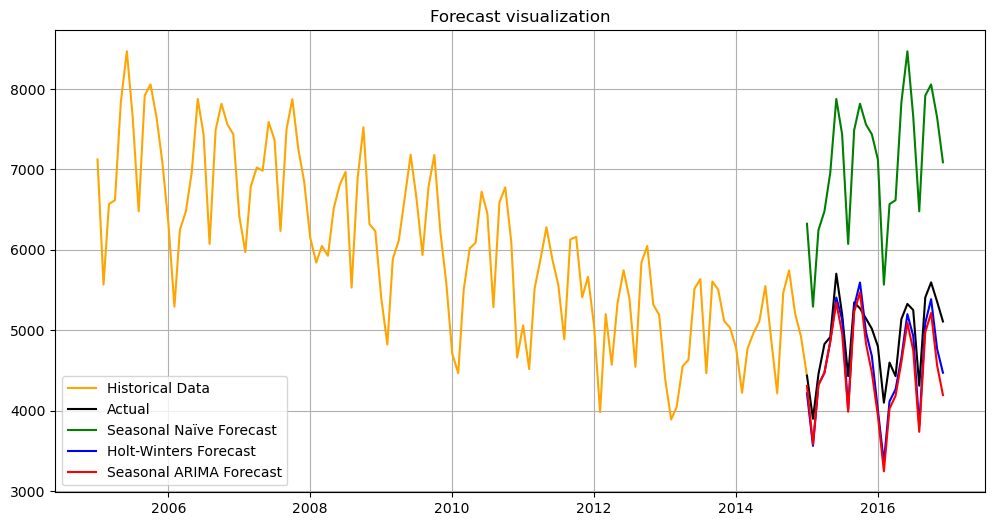

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(df_ym.index[:-h+1], df_ym['accidents'][:-h+1], label='Historical Data', color='orange')
plt.plot(df_ym.index[-h:], df_ym['accidents'][-h:], label='Actual', color='black')
plt.plot(df_ym.index[-h:], sn_pred, label='Seasonal Naïve Forecast', color='green')
plt.plot(df_ym.index[-h:], HW_pred, label='Holt-Winters Forecast', color='blue')
plt.plot(df_ym.index[-h:], SA_pred, label='Seasonal ARIMA Forecast',  color='red')
plt.legend()
plt.title('Forecast visualization')
plt.grid(True)
plt.show()